# NumPy 배열 생성과 변형

## NumPy의 자료형

NumPy의 `ndarray`클래스는 포함하는 모든 데이터가 같은 자료형(data type)이어야 한다. 또한 자료형 자체도 일반 파이썬에서 제공하는 것보다 훨씬 세분화되어 있다.

NumPy의 자료형은 `dtype` 이라는 인수로 지정한다. `dtype` 인수로 지정할 값은 다음 표에 보인것과 같은 dtype 접두사로 시작하는 문자열이고 비트/바이트 수를 의미하는 숫자가 붙을 수도 있다.

| dtype 접두사 | 설명 | 사용 예 |
|-|-|-|
| `t` | 비트 필드 | `t4` (4비트) | 
| `b` | 불리언 | `b` (참 혹은 거짓) | 
| `i` | 정수 | `i8` (64비트) | 
| `u` | 부호 없는 정수 | `u8` (64비트) | 
| `f` | 부동소수점 | `f8` (64비트) | 
| `c` | 복소 부동소수점 | `c16` (128비트) | 
| `O` | 객체 | `0` (객체에 대한 포인터) | 
| `S`, `a` | 문자열 | `S24` (24 글자) | 
| `U` | 유니코드 문자열 | `U24` (24 유니코드 글자) | 
| `V` | 기타 | `V12` (12바이트의 데이터 블럭) | 

`ndarray` 객체의 `dtype` 속성으로 자료형을 알 수 있다.

In [1]:
x = np.array([1, 2, 3])
x.dtype

dtype('int64')

만약 부동소수점을 사용하는 경우에는 무한대를 표현하기 위한 `np.inf`와 정의할 수 없는 숫자를 나타내는 `np.nan` 을 사용할 수 있다.

In [2]:
np.exp(-np.inf)

0.0

In [3]:
np.array([1, 0]) / np.array([0, 0])

array([ inf,  nan])

## 배열 생성

In [4]:
x = np.array([1, 2, 3])
x

array([1, 2, 3])

앞에서 파이썬 리스트를 NumPy의 `ndarray` 객체로 변환하여 생성하려면 `array` 명령을 사용하였다.  그러나 보통은 이러한 기본 객체없이 다음과 같은 명령을 사용하여 바로 `ndarray` 객체를 생성한다. 
 
 
* `zeros`, `ones`
* `zeros_like`, `ones_like`
* `empty`
* `arange`
* `linspace`, `logspace`
* `rand`, `randn`

크기가 정해져 있고 모든 값이 0인 배열을 생성하려면 `zeros` 명령을 사용한다. `dtype` 인수가 없으면 정수형이 된다.

In [5]:
a = np.zeros(5) 
a

array([ 0.,  0.,  0.,  0.,  0.])

`dtype` 인수를 명시하면 해당 자료형 원소를 가진 배열을 만든다.

In [6]:
b = np.zeros((5,2), dtype="f8")
b

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

문자열 배열도 가능하지면 모든 원소의 문자열 크기가 같아야 한다. 만약 더 큰 크기의 문자열을 할당하면 잘릴 수 있다.

In [7]:
c = np.zeros(5, dtype="S4")
c[0] = "abcd"
c[1] = "ABCDE"
c

array(['abcd', 'ABCD', '', '', ''], 
      dtype='|S4')

1이 아닌 0으로 초기화된 배열을 생성하려면 `ones` 명령을 사용한다.

In [8]:
d = np.ones((2,3,4), dtype="i8")
d

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]])

만약 크기를 튜플(tuple)로 명시하지 않고 특정한 배열 혹은 리스트와 같은 크기의 배열을 생성하고 싶다면 `ones_like`, `zeros_like` 명령을 사용한다.

In [9]:
e = range(10)
print(e)
f = np.ones_like(e, dtype="f")
f

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)

배열의 크기가 커지면 배열을 초기화하는데도 시간이 걸린다. 이 시간을 단축하려면 생성만 하고 초기화를 하지 않는 `empty` 명령을 사용할 수 있다. `empty` 명령으로 생성된 배열에 어떤 값이 들어있을지는 알 수 없다.

In [10]:
g = np.empty((4,3))
g

array([[  2.05461665e-316,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000]])

`arange` 명령은 NumPy 버전의 `range` 명령이라고 볼 수 있다. 해당하는 범위의 숫자 순열을 생성한다.

In [11]:
np.arange(10)  # 0 .. n-1  

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
np.arange(3, 21, 2)  # start, end (exclusive), step

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19])

`linspace` 명령이나 `logspace` 명령은 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할한다.

In [13]:
np.linspace(0, 100, 5)  # start, end, num-points

array([   0.,   25.,   50.,   75.,  100.])

In [14]:
np.logspace(0, 4, 4, endpoint=False)

array([    1.,    10.,   100.,  1000.])

임의의 난수를 생성하고 싶다면 random 서브패키지의 `rand` 혹은 `randn` 명령을 사용한다. `rand` 명령을 uniform 분포를 따르는 난수를 생성하고 `randn` 명령을 가우시안 정규 분포를 따르는 난수를 생성한다. 생성할 시드(seed)값을 지정하려면 `seed` 명령을 사용한다.

In [15]:
np.random.seed(0)

In [16]:
np.random.rand(4)

array([ 0.5488135 ,  0.71518937,  0.60276338,  0.54488318])

In [17]:
np.random.randn(3,5)

array([[ 1.86755799, -0.97727788,  0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351,  0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433,  1.49407907, -0.20515826,  0.3130677 ]])

## 배열의 크기 변형

일단 만들어진 배열의 내부 데이터는 보존한 채로 형태만 바꾸려면 `reshape` 명령이나 메서드를 사용한다. 예를 들어 12개의 원소를 가진 1차원 행렬은 3x4 형태의 2차원 행렬로 만들 수 있다.

In [18]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [19]:
b = a.reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

사용하는 원소의 갯수가 정해저 있기 때문에 `reshape` 명령의 형태 튜플의 원소 중 하나는 -1이라는 숫자로 대체할 수 있다. -1을 넣으면 해당 숫자는 다를 값에서 계산되어 사용된다.

In [20]:
a.reshape(2,2,-1)

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [21]:
a.reshape(2,-1,2)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

다차원 배열을 무조건 1차원으로 펼치기 위해서는 `flatten` 명령이나 메서드를 사용한다.

In [22]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

길이가 5인 1차원 배열과 행, 열의 갯수가 (5,1)인 2차원 배열은 데이터는 같아도 엄연히 다른 객체이다.

In [23]:
x = np.arange(5)
x

array([0, 1, 2, 3, 4])

In [24]:
y = x.reshape(5,1)
y

array([[0],
       [1],
       [2],
       [3],
       [4]])

이렇게 같은 배열에 대해 차원만 1차원 증가시키는 경우에는 `newaxis` 명령을 사용하기도 한다.

In [25]:
z = x[:, np.newaxis]
z

array([[0],
       [1],
       [2],
       [3],
       [4]])

## 배열 연결

행의 수나 열의 수가 같은 두 개 이상의 배열을 연결하여(concatenate) 더 큰 배열을 만들 때는 다음과 같은 명령을 사용한다.

* `hstack`
* `vstack`
* `dstack`
* `stack`
* `r_`
* `tile`

`hstack` 명령은 행의 수가 같은 두 개 이상의 배열을 옆으로 연결하여 열의 수가 더 많은 배열을 만든다. 연결할 배열은 하나의 리스트에 담아야 한다.

In [26]:
a1 = np.ones((2, 3))
a1

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [27]:
a2 = np.zeros((2, 2))
a2

array([[ 0.,  0.],
       [ 0.,  0.]])

In [28]:
np.hstack([a1, a2])

array([[ 1.,  1.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.]])

`vstack` 명령은 열의 수가 같은 두 개 이상의 배열을 위아래로 연결하여 행의 수가 더 많은 배열을 만든다. 연결할 배열은 마찬가지로 하나의 리스트에 담아야 한다.

In [29]:
b1 = np.ones((2, 3))
b1

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [30]:
b2 = np.zeros((3, 3))
b2

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [31]:
np.vstack([b1, b2])

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

`dstack` 명령은 제3의 축 즉, 행이나 열이 아닌 깊이(depth) 방향으로 배열을 합친다.

In [32]:
c1 = np.ones((2,3))
c1

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [33]:
c2 = np.zeros((2,3))
c2

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [34]:
np.dstack([c1, c2])

array([[[ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]],

       [[ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]]])

`stack` 명령은 새로운 차원(축으로) 배열을 연결하며 당연히 연결하고자 하는 배열들의 크기가 모두 같아야 한다.
`axis` 인수(디폴트 0)를 사용하여 연결후의 회전 방향을 정한다.

In [35]:
np.stack([c1, c2])

array([[[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]])

In [36]:
np.stack([c1, c2], axis=1)

array([[[ 1.,  1.,  1.],
        [ 0.,  0.,  0.]],

       [[ 1.,  1.,  1.],
        [ 0.,  0.,  0.]]])

`r_` 메서드는 `hstack` 명령과 유사하다. 다만 메서드임에도 불구하고 소괄호(parenthesis, `()`)를 사용하지 않고 인덱싱과 같이 대괄호(bracket, `[]`)를 사용한다.

In [37]:
np.r_[np.array([1,2,3]), 0, 0, np.array([4,5,6])]

array([1, 2, 3, 0, 0, 4, 5, 6])

`tile` 명령은 동일한 배열을 반복하여 연결한다.

In [38]:
a = np.array([0, 1, 2])
np.tile(a, 2)

array([0, 1, 2, 0, 1, 2])

In [39]:
np.tile(a, (3, 2))

array([[0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2]])

### 그리드 생성

변수가 2개인 2차원 함수의 그래프를 그리거나 표를 작성하려면 많은 좌표를 한꺼번에 생성하여 각 좌표에 대한 함수 값을 계산해야 한다.
예를 들어 x, y 라는 두 변수를 가진 함수에서 x가 0부터 2까지, y가 0부터 4까지의 사각형 영역에서 변화하는 과정을 보고 싶다면 이 사각형 영역 안의 다음과 같은 (x,y) 쌍 값들에 대해 함수를 계산해야 한다. 

$$ (x,y) = (0,0), (0,1), (0,2), (0,3), (0,4), (1,0), \cdots (2,4) $$

이러한 과정을 자동으로 해주는 것이 NumPy의 `meshgrid` 명령이다. `meshgrid` 명령은 사각형 영역을 구성하는 가로축의 점들과 세로축의 점을 나타내는 두 벡터를 인수로 받아서 이 사각형 영역을 이루는 조합을 출력한다. 단 조합이 된 (x,y)쌍을 x값만을 표시하는 행렬과 y값만을 표시하는 행렬 두 개로 분리하여 출력한다.

In [40]:
x = np.arange(3)
x

array([0, 1, 2])

In [41]:
y = np.arange(5)
y

array([0, 1, 2, 3, 4])

In [42]:
X, Y = np.meshgrid(x, y)

In [43]:
X

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [44]:
Y

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [45]:
[zip(x, y) for x, y in zip(X, Y)]

[[(0, 0), (1, 0), (2, 0)],
 [(0, 1), (1, 1), (2, 1)],
 [(0, 2), (1, 2), (2, 2)],
 [(0, 3), (1, 3), (2, 3)],
 [(0, 4), (1, 4), (2, 4)]]

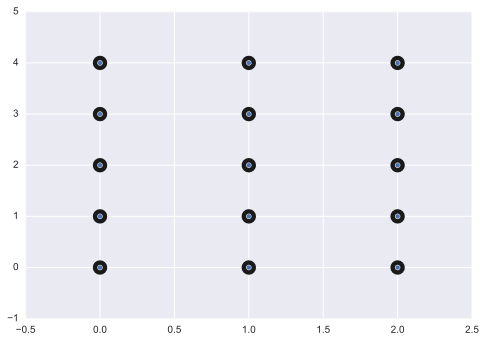

In [46]:
plt.scatter(X, Y, linewidths=10);